In [1]:
import pandas as pd
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('seaborn')
%matplotlib inline
import sklearn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn import tree, preprocessing
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer,recall_score,precision_score,roc_auc_score,roc_curve, classification_report, confusion_matrix

In [2]:
df_new = pd.read_csv('data_updated.csv')
#from sklearn.preprocessing import LabelEncoder
df_new.loc[(df_new.language == 'English'),'language']= 1
df_new.loc[(df_new.language == 'Other Languages'),'language']= 0
df_new['duration'] = df_new['duration_ms']/60000

In [3]:
df_new = df_new.drop(['Unnamed: 0','duration_ms','id','artists','name','release_date','emotion'], axis = 1)

In [4]:
df_new.head()

,year,key,mode,tempo,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,anger,disgust,fear,joy,positive,sadness,surprise,trust,popularity,duration
0,1921,10,1,80.954,0.982,0.279,0.211,0.878000,0.665,-20.096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,13.861117
1,1921,7,1,60.936,0.732,0.819,0.341,0.000000,0.160,-12.441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3.008883
2,1921,3,1,110.339,0.961,0.328,0.166,0.913000,0.101,-14.850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,8.334367
3,1921,5,1,100.109,0.967,0.275,0.309,0.000028,0.381,-9.316,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,3,3.500000
4,1921,3,1,101.665,0.957,0.418,0.193,0.000002,0.229,-10.096,...,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,2,2.778217


In [5]:
df_new['pop'] = np.where(df_new['popularity'] >= 33, 1, 0)

# First set of features:

valence, year, acousticness, danceability, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, vocab, avg_word_len, uniqueness, language, duration

In [6]:
from sklearn.model_selection import train_test_split
train_1, test_1 = train_test_split(df_new, test_size = 0.3, random_state=0)
x_train_1 = train_1.drop(['popularity','pop'], axis=1)
y_train_1 = train_1['pop']
x_test_1 = test_1.drop(['popularity','pop'], axis=1)
y_test_1 = test_1['pop']
scaler=StandardScaler()
scaler.fit(x_train_1)
x_train_1 = scaler.transform(x_train_1)
x_test_1 = scaler.transform(x_test_1)

In [7]:
tree_mod= tree.DecisionTreeClassifier(max_depth=3)
treemod1 = tree_mod.fit(x_train_1, y_train_1)

xgb_rb = xgb.XGBClassifier()
xgb_mod1 = xgb_rb.fit(x_train_1, y_train_1)

rf = RandomForestClassifier(n_jobs=8)
rf_mod1 = rf.fit(x_train_1, y_train_1)

[06:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [8]:
def train_model(model,x_train,y_train,x_test,y_test):
    pred = model.predict(x_test)
    model = model.fit(x_train, y_train)
    result = dict()
    result['accuracy_score']=accuracy_score(y_test, pred)
    result['recall_score']=recall_score(y_test, pred)
    result['f1_score']=f1_score(y_test, pred)
    result['roc_auc_score']=roc_auc_score(y_test, pred)
    # confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    return result

In [9]:
train_model(treemod1,x_train_1,y_train_1,x_test_1,y_test_1)

confusion_matrix
       0      1
0  18776   5839
1   1892  24689


{'accuracy_score': 0.8489921087584967,
 'recall_score': 0.9288213385500922,
 'f1_score': 0.8646272916703146,
 'roc_auc_score': 0.845804128547847}

In [10]:
train_model(xgb_mod1,x_train_1,y_train_1,x_test_1,y_test_1)

[06:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion_matrix
       0      1
0  20885   3730
1   3577  23004


{'accuracy_score': 0.8572740057817017,
 'recall_score': 0.8654301944998307,
 'f1_score': 0.8629466379067805,
 'roc_auc_score': 0.8569482883935271}

In [11]:
train_model(rf_mod1,x_train_1,y_train_1,x_test_1,y_test_1)

confusion_matrix
       0      1
0  21379   3236
1   4560  22021


{'accuracy_score': 0.8477224783186187,
 'recall_score': 0.8284488920657612,
 'f1_score': 0.8496083953856244,
 'roc_auc_score': 0.8484921689660515}

# Second set of features:

year, key, mode, tempo, vocab, avg_word_len, uniqueness, language, duration

In [12]:
df_2 = df_new[['year','key','mode','tempo','#vocab','avg_word_len','uniqueness','language','comm','negative','anticipation',
               'anger','disgust','fear','joy','positive','sadness','surprise','trust','duration','pop']]
train_2, test_2 = train_test_split(df_2, test_size = 0.3, random_state=0)
x_train_2 = train_2.drop(['pop'], axis=1)
y_train_2 = train_2['pop']
x_test_2 = test_2.drop(['pop'], axis=1)
y_test_2 = test_2['pop']
scaler=StandardScaler()
scaler.fit(x_train_2)
x_train_2 = scaler.transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)

In [13]:
treemod2 = tree_mod.fit(x_train_2, y_train_2)

xgb_mod2 = xgb_rb.fit(x_train_2, y_train_2)

rf_mod2 = rf.fit(x_train_2, y_train_2)

[06:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
train_model(treemod2,x_train_2,y_train_2,x_test_2,y_test_2)

confusion_matrix
       0      1
0  18776   5839
1   1892  24689


{'accuracy_score': 0.8489921087584967,
 'recall_score': 0.9288213385500922,
 'f1_score': 0.8646272916703146,
 'roc_auc_score': 0.845804128547847}

In [15]:
train_model(xgb_mod2,x_train_2,y_train_2,x_test_2,y_test_2)

[06:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion_matrix
       0      1
0  20646   3969
1   3552  23029


{'accuracy_score': 0.853093991718103,
 'recall_score': 0.8663707159249088,
 'f1_score': 0.8596278392653838,
 'roc_auc_score': 0.8525637857503886}

In [16]:
train_model(rf_mod2,x_train_2,y_train_2,x_test_2,y_test_2)

confusion_matrix
       0      1
0  21143   3472
1   4652  21929


{'accuracy_score': 0.8413157277912336,
 'recall_score': 0.824987773221474,
 'f1_score': 0.8437151321611327,
 'roc_auc_score': 0.8419677846403938}

# Third set of features
valence, year, acousticness, danceability, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, tempo

In [17]:
df_3 = df_new[['year','key','mode','tempo','duration', 'pop']]
train_3, test_3 = train_test_split(df_3, test_size = 0.3, random_state=0)
x_train_3 = train_3.drop(['pop'], axis=1)
y_train_3 = train_3['pop']
x_test_3 = test_3.drop(['pop'], axis=1)
y_test_3 = test_3['pop']
scaler=StandardScaler()
scaler.fit(x_train_3)
x_train_3 = scaler.transform(x_train_3)
x_test_3 = scaler.transform(x_test_3)

In [18]:
treemod3 = tree_mod.fit(x_train_3, y_train_3)

xgb_mod3 = xgb_rb.fit(x_train_3, y_train_3)

rf_mod3 = rf.fit(x_train_3, y_train_3)

[06:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
train_model(treemod3,x_train_3,y_train_3,x_test_3,y_test_3)

confusion_matrix
       0      1
0  18776   5839
1   1892  24689


{'accuracy_score': 0.8489921087584967,
 'recall_score': 0.9288213385500922,
 'f1_score': 0.8646272916703146,
 'roc_auc_score': 0.845804128547847}

In [20]:
train_model(xgb_mod3,x_train_3,y_train_3,x_test_3,y_test_3)

[06:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion_matrix
       0      1
0  20512   4103
1   3391  23190


{'accuracy_score': 0.8536213766700523,
 'recall_score': 0.8724276739024115,
 'f1_score': 0.860897650072391,
 'roc_auc_score': 0.8528703472091786}

In [21]:
train_model(rf_mod3,x_train_3,y_train_3,x_test_3,y_test_3)

confusion_matrix
       0      1
0  21033   3582
1   4836  21745


{'accuracy_score': 0.835573091647785,
 'recall_score': 0.8180655355328994,
 'f1_score': 0.8378284657470909,
 'roc_auc_score': 0.8362722558834517}

In [22]:
# parameters = {
#     'max_depth': [10, 15, 20],
#     'min_child_weight': [2, 5, 10],
#     'subsample': [0.7, 0.8, 0.85],
#     'colsample_bytree': [0.6, 0.7, 0.8]
# }

In [23]:
param_grid = dict(
    max_depth = [4, 5, 6, 7],
    learning_rate = np.linspace(0.03, 0.3, 5),
    n_estimators = [100, 200, 300]
)


# Grid Search for parameter tuning

In [24]:
#sklearn.metrics.SCORERS.keys()

In [25]:
grid = GridSearchCV(xgb_mod1,param_grid,cv=5, n_jobs=8,scoring = 'accuracy')
grid.fit(x_train_1, y_train_1) 

[06:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_esti...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=True,
              

In [26]:
xgb_1_new = grid.best_estimator_
xgb_1_new.fit(x_train_1, y_train_1)

print("Boosted Tree Training Acc",xgb_1_new.score(x_train_1,y_train_1))
print("Boosted Tree Testing Acc",xgb_1_new.score(x_test_1,y_test_1))

[06:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Boosted Tree Training Acc 0.8707233565215935
Boosted Tree Testing Acc 0.860282053285413


In [27]:
#params_rf = {"n_estimators": [50, 200, 300, 350, 400, 600],
#              'criterion': ['gini', 'entropy'],
#              'max_depth': list(range(1, 9, 2)),
#              'bootstrap': [True, False]}

In [28]:
#grid_f = GridSearchCV(rf_1, params_space)
#grid.fit(X_train, y_train)

In [29]:
x_train_1_df = pd.DataFrame(columns=train_1.drop(['popularity','pop'], axis=1).columns, data=x_train_1)

In [30]:
import shap
shap.initjs() 
explainer = shap.TreeExplainer(xgb_1_new)
shap_values = explainer.shap_values(x_train_1)
for i in range(10):
    shap.force_plot(explainer.expected_value, shap_values[i,:], x_train_1_df.iloc[i,:])

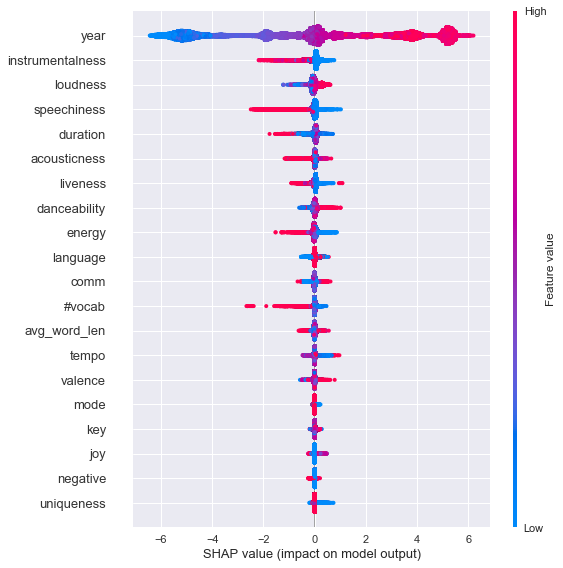

In [31]:
shap.summary_plot(shap_values, x_train_1_df)

In [32]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

# KNN

In [33]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs = 8, scoring='accuracy')
grid.fit(x_train_1,y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=8,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
grid.best_score_

0.8335635416928268

In [35]:
score1 = grid.cv_results_['mean_test_score']
neighbors = list(grid.cv_results_['param_n_neighbors'])

Text(0, 0.5, 'Cross-Validated Accuracy')

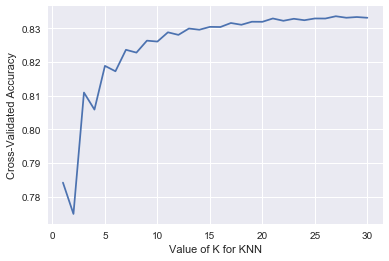

In [36]:
plt.plot(neighbors, score1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [37]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs = 8, scoring='accuracy')
grid2.fit(x_train_2,y_train_2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=8,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [38]:
grid2.best_score_

0.8381593376696217

In [39]:
score2 = grid2.cv_results_['mean_test_score']
neighbors = list(grid2.cv_results_['param_n_neighbors'])

Text(0, 0.5, 'Cross-Validated Accuracy')

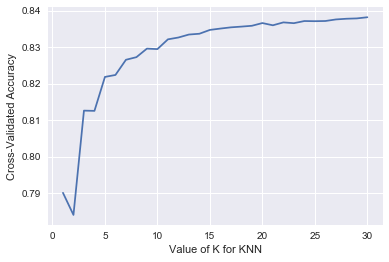

In [40]:
plt.plot(neighbors, score2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [41]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid3 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs = 8, scoring='accuracy')
grid3.fit(x_train_3,y_train_3)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=8,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [42]:
grid3.best_score_

0.8453083536335251

In [43]:
score3 = grid3.cv_results_['mean_test_score']
neighbors = list(grid3.cv_results_['param_n_neighbors'])

Text(0, 0.5, 'Cross-Validated Accuracy')

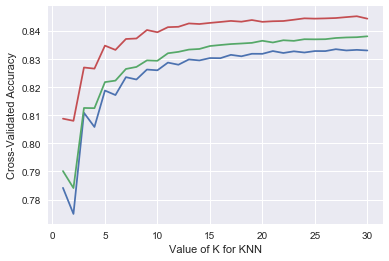

In [44]:
plt.plot(neighbors, score1)
plt.plot(neighbors, score2)
plt.plot(neighbors, score3)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Regression tree

In [48]:
df_new['language'] = df_new['language'].apply(lambda x: 1 if x==1 else 0)

In [51]:
train_1, test_1 = train_test_split(df_new, test_size = 0.3, random_state=0)
x_train_1 = train_1.drop(['popularity','pop'], axis=1)
y_train_1 = train_1['popularity']
x_test_1 = test_1.drop(['popularity','pop'], axis=1)
y_test_1 = test_1['popularity']

In [52]:
tree_1 = tree.DecisionTreeRegressor(max_depth=3)
tree_1.fit(x_train_1,y_train_1)

print("Simple Tree Training R-Square",tree_1.score(x_train_1,y_train_1))
print("Simple Tree Testing R-Square",tree_1.score(x_test_1,y_test_1))

rf_1 = RandomForestRegressor(n_jobs=8)
rf_1.fit(x_train_1,y_train_1)

print("RandomForest Training R-Square",rf_1.score(x_train_1,y_train_1))
print("RandomForest Testing R-Square",rf_1.score(x_test_1,y_test_1))

xgb_rb_1 = xgb.XGBRegressor()
xgb_rb_1.fit(x_train_1, y_train_1)

print("Boosted Tree Training R-Square",xgb_rb_1.score(x_train_1,y_train_1))
print("Boosted Tree Testing R-Square",xgb_rb_1.score(x_test_1,y_test_1))

Simple Tree Training R-Square 0.769276427200259
Simple Tree Testing R-Square 0.7745393994586343
RandomForest Training R-Square 0.9606536852773168
RandomForest Testing R-Square 0.7901931325009655
Boosted Tree Training R-Square 0.839747497038512
Boosted Tree Testing R-Square 0.8094200619081946


In [53]:
def calc_rmse(pred,actual):
    return np.sqrt(np.sum((pred - actual)**2)/len(pred))

In [54]:
tree_pred_train1 = tree_1.predict(x_train_1)
xgb_pred_train1 = xgb_rb_1.predict(x_train_1)
rf_pred_train1 = rf_1.predict(x_train_1)
print(calc_rmse(tree_pred_train1, y_train_1),calc_rmse(rf_pred_train1, y_train_1),calc_rmse(xgb_pred_train1, y_train_1))

10.481672782040086 4.3284922507697665 8.735484923761303


In [55]:
tree_pred_test1 = tree_1.predict(x_test_1)
xgb_pred_test1 = xgb_rb_1.predict(x_test_1)
rf_pred_test1 = rf_1.predict(x_test_1)
print(calc_rmse(tree_pred_test1, y_test_1),calc_rmse(rf_pred_test1, y_test_1),calc_rmse(xgb_pred_test1, y_test_1))

10.369035136897057 10.002599178665717 9.533263652518334


In [56]:
df_2 = df_new[['year','key','mode','tempo','#vocab','avg_word_len','uniqueness','language','comm','negative','anticipation',
               'anger','disgust','fear','joy','positive','sadness','surprise','trust','duration','popularity']]
train_2, test_2 = train_test_split(df_2, test_size = 0.3, random_state=0)
x_train_2 = train_2.drop(['popularity'], axis=1)
y_train_2 = train_2['popularity']
x_test_2 = test_2.drop(['popularity'], axis=1)
y_test_2 = test_2['popularity']

In [57]:
tree_2 = tree.DecisionTreeRegressor(max_depth=3)
tree_2.fit(x_train_2,y_train_2)

#Get the R-Square for the predicted vs actuals on the test sample
print("Simple Tree Training R-Square",tree_2.score(x_train_2,y_train_2))
print("Simple Tree Testing R-Square",tree_2.score(x_test_2,y_test_2))

rf_2 = RandomForestRegressor(n_jobs=8)
rf_2.fit(x_train_2,y_train_2)

print("Random Forest Training R-Square",rf_2.score(x_train_2,y_train_2))
print("Random Forest Testing R-Square",rf_2.score(x_test_2,y_test_2))

xgb_rb_2 = xgb.XGBRegressor()
xgb_rb_2.fit(x_train_2, y_train_2)

print("Boosted Tree Training R-Square",xgb_rb_2.score(x_train_2,y_train_2))
print("Boosted Tree Testing R-Square",xgb_rb_2.score(x_test_2,y_test_2))

Simple Tree Training R-Square 0.769276427200259
Simple Tree Testing R-Square 0.7745393994586343
Random Forest Training R-Square 0.9582292571884377
Random Forest Testing R-Square 0.7738030859244707
Boosted Tree Training R-Square 0.8240934913889724
Boosted Tree Testing R-Square 0.8001225260055805


In [58]:
tree_pred_train2 = tree_2.predict(x_train_2)
xgb_pred_train2 = xgb_rb_2.predict(x_train_2)
rf_pred_train2 = rf_2.predict(x_train_2)
print(calc_rmse(tree_pred_train2, y_train_2),calc_rmse(rf_pred_train2, y_train_2),calc_rmse(xgb_pred_train2, y_train_2))

10.481672782040086 4.459854730742085 9.152201097832421


In [59]:
tree_pred_test2 = tree_2.predict(x_test_2)
xgb_pred_test2 = xgb_rb_2.predict(x_test_2)
rf_pred_test2 = rf_2.predict(x_test_2)
print(calc_rmse(tree_pred_test2, y_test_2),calc_rmse(rf_pred_test2, y_test_2),calc_rmse(xgb_pred_test2, y_test_2))

10.369035136897057 10.385953031927517 9.763037424787102


In [60]:
df_3 = df_new[['year','key','mode','tempo','duration', 'popularity']]
train_3, test_3 = train_test_split(df_3, test_size = 0.3, random_state=0)
x_train_3 = train_3.drop(['popularity'], axis=1)
y_train_3 = train_3['popularity']
x_test_3 = test_3.drop(['popularity'], axis=1)
y_test_3 = test_3['popularity']

In [61]:
tree_3 = tree.DecisionTreeRegressor(max_depth=3)
tree_3.fit(x_train_3,y_train_3)

print("Simple Tree Training R-Square",tree_3.score(x_train_3,y_train_3))
print("Simple Tree Testing R-Square",tree_3.score(x_test_3,y_test_3))

rf_3 = RandomForestRegressor(n_jobs=8)
rf_3.fit(x_train_3,y_train_3)

print("Random Forest Training R-Square",rf_3.score(x_train_3,y_train_3))
print("Random Forest Testing R-Square",rf_3.score(x_test_3,y_test_3))


xgb_rb_3 = xgb.XGBRegressor()
xgb_rb_3.fit(x_train_3, y_train_3)

print("Boosted Tree Training R-Square",xgb_rb_3.score(x_train_3,y_train_3))
print("Boosted Tree Testing R-Square",xgb_rb_3.score(x_test_3,y_test_3))

Simple Tree Training R-Square 0.769276427200259
Simple Tree Testing R-Square 0.7745393994586343
Random Forest Training R-Square 0.9564697696301756
Random Forest Testing R-Square 0.7648874288962907
Boosted Tree Training R-Square 0.8153015310634744
Boosted Tree Testing R-Square 0.7976702307233168


In [62]:
tree_pred_train3 = tree_3.predict(x_train_3)
xgb_pred_train3 = xgb_rb_3.predict(x_train_3)
rf_pred_train3 = rf_3.predict(x_train_3)
print(calc_rmse(tree_pred_train3, y_train_3),calc_rmse(rf_pred_train3, y_train_3),calc_rmse(xgb_pred_train3, y_train_3))

10.481672782040086 4.5528159741123675 9.378130359899687


In [63]:
tree_pred_test3 = tree_3.predict(x_test_3)
xgb_pred_test3 = xgb_rb_3.predict(x_test_3)
rf_pred_test3 = rf_3.predict(x_test_3)
print(calc_rmse(tree_pred_test3, y_test_3),calc_rmse(rf_pred_test3, y_test_3),calc_rmse(xgb_pred_test3, y_test_3))

10.369035136897057 10.588658498198457 9.82274589018719


In [64]:
param_grid_reg = dict(
    max_depth = [4, 5, 6, 7],
    learning_rate = np.linspace(0.03, 0.3, 5),
    n_estimators = [100, 200, 300]
)

In [65]:
grid_reg = GridSearchCV(xgb_rb_1,param_grid_reg,cv=5, n_jobs=8,scoring = 'neg_mean_squared_error')
grid_reg.fit(x_train_1, y_train_1) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estim...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='warn', n_jobs=8,
            

In [66]:
xgb_1_new_reg = grid_reg.best_estimator_
xgb_1_new_reg.fit(x_train_1, y_train_1)

print("Boosted Tree Training R-Square",xgb_1_new_reg.score(x_train_1,y_train_1))
print("Boosted Tree Testing R-Square",xgb_1_new_reg.score(x_test_1,y_test_1))

Boosted Tree Training R-Square 0.8309824071968858
Boosted Tree Testing R-Square 0.812926071447392


In [67]:
print("previous xgboost model rmse: ", calc_rmse(xgb_rb_1.predict(x_test_1), y_test_1))
print("xgboost rmse after hypertuning:", calc_rmse(xgb_1_new_reg.predict(x_test_1), y_test_1))

previous xgboost model rmse:  9.533263652518334
xgboost rmse after hypertuning: 9.445166944406209


In [68]:
import shap
shap.initjs() 
explainer = shap.TreeExplainer(xgb_rb_1)
shap_values = explainer.shap_values(x_train_1)
#for i in range(10):
#    shap.force_plot(explainer.expected_value, shap_values[i,:], x_train_1.iloc[i,:])

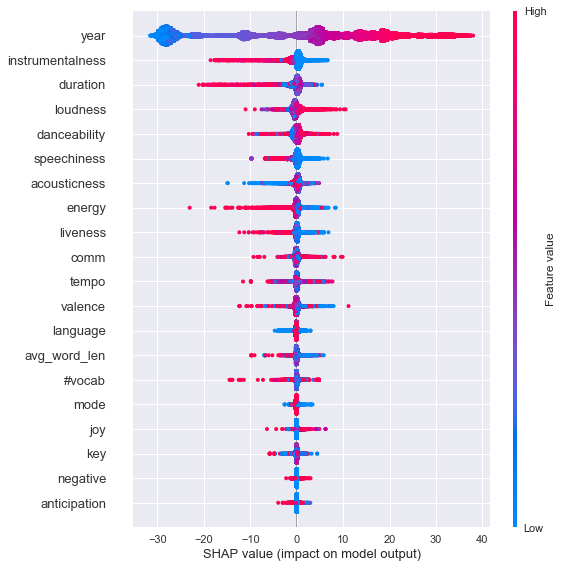

In [69]:
shap.summary_plot(shap_values, x_train_1)